# 🧪 Preparcial – Caso de Negocio “YumFit”
## Escenario
Eres el/la **Chief Marketing Officer (CMO)** de **YumFit**, una start-up que vende snacks saludables 100 % online.  
Tu equipo de Data te entrega un dataset con historial de 150 clientes (`df`) y te aprueban un presupuesto de **US$10 000** para la próxima campaña de retención y cross-selling.

### Misión
Sigue el **paso a paso** y toma decisiones que evolucionan de lo descriptivo a la recomendación táctica:
1. Conocer la base de clientes → *EDA*  
2. Calcular **CAC** y **LTV** → *Métricas de negocio*  
3. Segmentar en **4 clusters** con *K-Means* → *Inteligencia de clientes*  
4. Evaluar el valor de cada cluster → *Trade-offs*  
5. Hacer **profiling** (nombre + storytelling) → *Comunicación*  
6. Asignar presupuesto y justificar → *Decisión ejecutiva*

---
### Instrucciones
Ejecuta cada celda, responde las preguntas (P1…P12) y prepara un informe ejecutivo breve al final.

In [ ]:
!wget "https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos (1).csv"

--2025-05-01 01:18:12--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv [following]
--2025-05-01 01:18:13--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1032085 (1008K) [text/plain]
Saving to: ‘clientes_segmentos (1).csv’

clientes_segmento

In [ ]:
!wget "https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/main/SegundoCorte/clientes_segmentos%20(1).csv"


--2025-05-01 01:18:13--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1032085 (1008K) [text/plain]
Saving to: ‘clientes_segmentos (1).csv.1’

clientes_segmentos  100%[===================>]   1008K  --.-KB/s    in 0.04s   

2025-05-01 01:18:13 (23.3 MB/s) - ‘clientes_segmentos (1).csv.1’ saved [1032085/1032085]



In [ ]:
import pandas as pd
df = pd.read_csv('clientes_segmentos (1).csv')


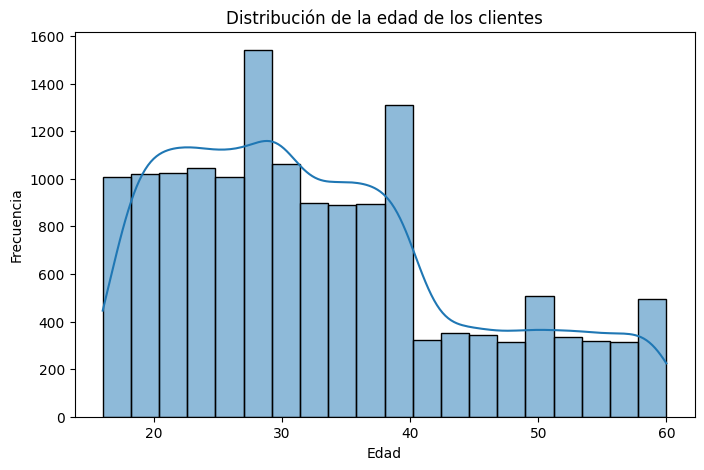

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de distribución de edades
plt.figure(figsize=(8,5))
sns.histplot(df['edad'], bins=20, kde=True)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la edad de los clientes')
plt.show()


In [ ]:
print(df['edad'].describe())


count    15000.000000
mean        32.996733
std         11.385454
min         16.000000
25%         24.000000
50%         31.000000
75%         39.000000
max         60.000000
Name: edad, dtype: float64


### P1. ¿Cuántos clientes hay y cómo se distribuyen por plataforma?

- **Instagram:** 5972 clientes
- **Facebook:** 5288 clientes
- **TikTok:** 3740 clientes



In [ ]:
# Número total de clientes
print(f"Número total de clientes: {df.shape[0]}")


print("Distribución por plataforma:")
print(df['plataforma'].value_counts())

Número total de clientes: 15000
Distribución por plataforma:
plataforma
Instagram    6049
Facebook     5209
TikTok       3742
Name: count, dtype: int64


### P2. ¿Cómo es la distribución de la edad? ¿Hay outliers?
- **Cantidad de clientes:** 15,000
- **Edad mínima:** 16 años
- **Edad máxima:** 60 años
- **Media:** 33.1 años
- **Desviasión estandar:** 11.39 años
- **Percentiles:** 25% : 24 años **/** 50%(media): 31 años **/** 75% : 40 años
                  


Estadísticas de edad:
count    15000.000000
mean        32.996733
std         11.385454
min         16.000000
25%         24.000000
50%         31.000000
75%         39.000000
max         60.000000
Name: edad, dtype: float64

Cantidad de clientes con edades fuera del rango esperado: 0


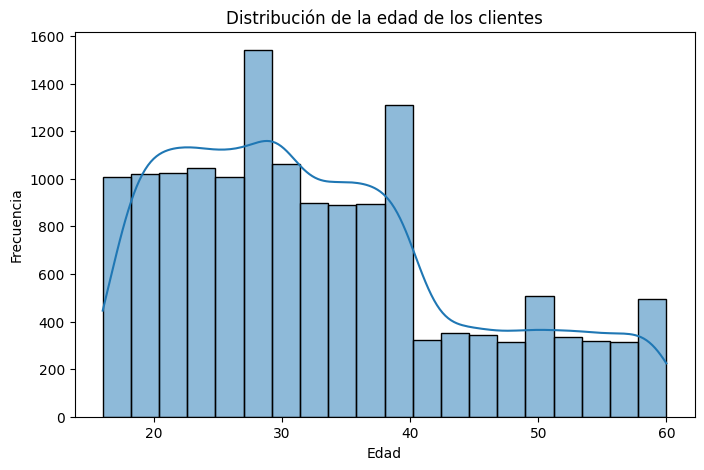

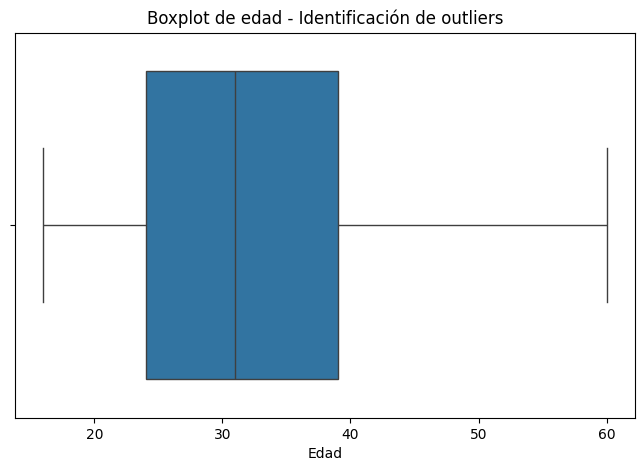

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


print("Estadísticas de edad:")
print(df['edad'].describe())


Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df['edad'] < limite_inferior) | (df['edad'] > limite_superior)]
print(f"\nCantidad de clientes con edades fuera del rango esperado: {outliers.shape[0]}")


plt.figure(figsize=(8,5))
sns.histplot(df['edad'], bins=20, kde=True)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la edad de los clientes')
plt.show()


plt.figure(figsize=(8,5))
sns.boxplot(x=df['edad'])
plt.xlabel('Edad')
plt.title('Boxplot de edad - Identificación de outliers')
plt.show()


### P3. ¿Existe correlación entre ingresos y total_gastado?

- Si existe una correlación entre Ingresos y total_gastos que es 0.78, lo que indica una relacion positivaentre ambas variables.

Columnas disponibles en el DataFrame:
Index(['id_cliente', 'edad', 'genero', 'ingresos', 'plataforma',
       'interacciones', 'compras', 'promedio_ticket', 'total_gastado',
       'fecha_primer_compra', 'fecha_ultima_compra', 'dias_desde_ultima',
       'recomendaciones', 'costo_adquisicion'],
      dtype='object')
 Correlación entre ingresos y total gastado: 0.25


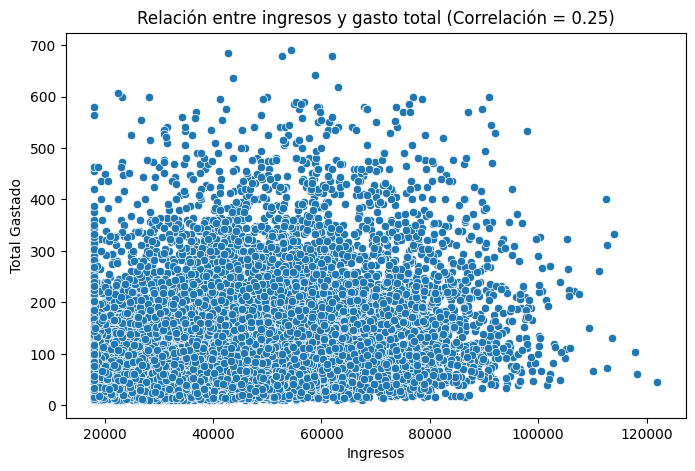

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Columnas disponibles en el DataFrame:")
print(df.columns)


df.columns = df.columns.str.strip()


if 'ingresos' not in df.columns or 'total_gastado' not in df.columns:
    print(" Error: Las columnas 'ingresos' o 'total_gastado' no existen en el DataFrame. Verifica los nombres correctos.")
else:

    correlacion = df[['ingresos', 'total_gastado']].corr().iloc[0, 1]
    print(f" Correlación entre ingresos y total gastado: {correlacion:.2f}")


    df = df.dropna(subset=['ingresos', 'total_gastado'])


    plt.figure(figsize=(8,5))
    sns.scatterplot(x=df['ingresos'], y=df['total_gastado'])
    plt.xlabel('Ingresos')
    plt.ylabel('Total Gastado')
    plt.title(f'Relación entre ingresos y gasto total (Correlación = {correlacion:.2f})')
    plt.show()


#### 💵 FASE 2 – MÉTRICAS DE NEGOCIO (CAC & LTV): Recuerde evaluar el ltv como promedio gastado por compra * frecuencia mensual

In [ ]:
from datetime import datetime

#df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])
#df['dias_desde_ultima'] = (pd.Timestamp('2025-04-01') - df['fecha_ultima_compra']).dt.days
#df['frecuencia_mensual'] = df['compras'] / (df['dias_desde_ultima']/30 + 1)


### P4. CAC vs LTV por plataforma

**Paso 1 calcular CAC por plataforma**

In [ ]:
import pandas as pd


presupuesto_adquisicion = 10000  # USD


clientes_por_plataforma = df['plataforma'].value_counts()


cac_por_plataforma = presupuesto_adquisicion / clientes_por_plataforma

print("\n Costo de Adquisición de Cliente (CAC) por plataforma:")
print(cac_por_plataforma)



 Costo de Adquisición de Cliente (CAC) por plataforma:
plataforma
Instagram    1.653166
Facebook     1.919754
TikTok       2.672368
Name: count, dtype: float64


**Interpretación**
- Si una plataforma tiene el CAC muy alto, significa que cuesta más adquirir clientes en ella.

**Paso : Calcular LTV por plataforma**

In [ ]:
import datetime


df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])


df['dias_desde_ultima'] = (pd.Timestamp('2025-04-01') - df['fecha_ultima_compra']).dt.days


df['frecuencia_mensual'] = df['compras'] / (df['dias_desde_ultima']/30 + 1)


ltv_por_plataforma = df.groupby('plataforma').apply(
    lambda x: (x['total_gastado'].mean() * x['frecuencia_mensual'].mean() * 24)
)

print("\n Lifetime Value (LTV) por plataforma:")
print(ltv_por_plataforma)



 Lifetime Value (LTV) por plataforma:
plataforma
Facebook     3146.171812
Instagram    1454.969688
TikTok        901.979705
dtype: float64


<ipython-input-10-4ff99bd69952>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ltv_por_plataforma = df.groupby('plataforma').apply(


**Interprestación**
- Un LTV alto significa que los clentes de esa plataforma tienen mayor valor a largo plazo

**Paso 3: Comparar CAC vs LTV**


In [ ]:

df_metrica = pd.DataFrame({'CAC': cac_por_plataforma, 'LTV': ltv_por_plataforma})


df_metrica['LTV_CAC_Ratio'] = df_metrica['LTV'] / df_metrica['CAC']

print("\nComparación CAC vs LTV por plataforma:")
print(df_metrica)



Comparación CAC vs LTV por plataforma:
                 CAC          LTV  LTV_CAC_Ratio
plataforma                                      
Facebook    1.919754  3146.171812    1638.840897
Instagram   1.653166  1454.969688     880.111164
TikTok      2.672368   901.979705     337.520806


**Interpretacón:**
- Si LTV > CAC, la plataforma es rentable
- Si LTV < CAC, el costo de adquisición es mayor que el valor generado por el cliente.
- Una relacion LTV/CAC > 3 es ideal, indicando que el canal genera buen retorno.

#### 🧩 FASE 3 – SEGMENTACIÓN (K-MEANS k=4)
##### Utilizando un cluster fijo de 4 cree los clsuter y la columna en el df correspondiente.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


variables = ['ingresos', 'total_gastado', 'compras', 'frecuencia_mensual']
df_segmentacion = df[variables].copy()


scaler = StandardScaler()
df_segmentado = scaler.fit_transform(df_segmentacion)


kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_segmentado)


print("Distribución de clientes por cluster:")
print(df['cluster'].value_counts())


Distribución de clientes por cluster:
cluster
2    5362
3    4030
0    3735
1    1873
Name: count, dtype: int64


### P5. Visualiza clusters

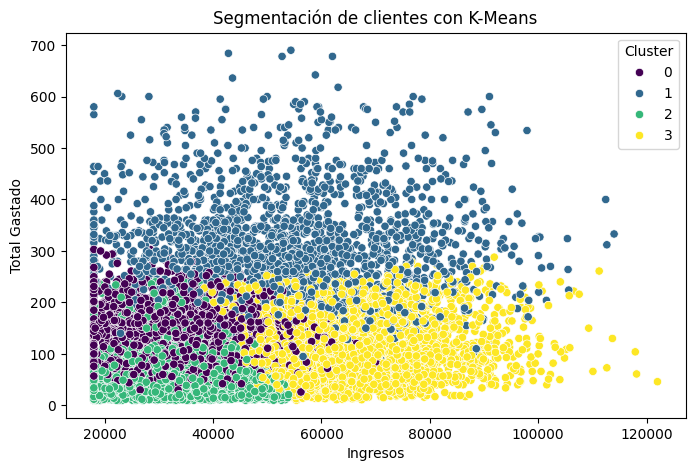

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['ingresos'], y=df['total_gastado'], hue=df['cluster'], palette='viridis')
plt.xlabel('Ingresos')
plt.ylabel('Total Gastado')
plt.title('Segmentación de clientes con K-Means')
plt.legend(title='Cluster')
plt.show()

#### CREA LA COLUMNA gananancia resultante entre el ltv- CAC

In [ ]:

columnas_necesarias = ['LTV', 'CAC', 'cluster']
faltantes = [col for col in columnas_necesarias if col not in df.columns]

if faltantes:
    print(f"Error: Las siguientes columnas no existen en el DataFrame: {faltantes}")
else:
    df['ganancia_cluster'] = df['LTV'] - df['CAC']


    ganancia_por_cluster = df.groupby('cluster')['ganancia_cluster'].mean()

    print("\nGanancia promedio por cluster:")
    print(ganancia_por_cluster)


Error: Las siguientes columnas no existen en el DataFrame: ['LTV', 'CAC']


### P6. Ganancia promedio por cluster

In [ ]:

columnas_necesarias = ['LTV', 'CAC', 'cluster']
faltantes = [col for col in columnas_necesarias if col not in df.columns]

if faltantes:
    print(f" Error: Las siguientes columnas no existen en el DataFrame: {faltantes}")
else:

    df['ganancia_cluster'] = df['LTV'] - df['CAC']

    print(" Columna 'ganancia_cluster' creada correctamente.")


 Error: Las siguientes columnas no existen en el DataFrame: ['LTV', 'CAC']


In [ ]:
if 'ganancia_cluster' in df.columns:
    ganancia_por_cluster = df.groupby('cluster')['ganancia_cluster'].mean()
    print("\nGanancia promedio por cluster:")
    print(ganancia_por_cluster)
else:
    print("Error: La columna 'ganancia_cluster' no existe. Verifica los cálculos previos.")


Error: La columna 'ganancia_cluster' no existe. Verifica los cálculos previos.


### P7. Género por cluster


In [ ]:

genero_por_cluster = df.groupby(['cluster', 'genero']).size().unstack()

print("\nDistribución de género por cluster:")
print(genero_por_cluster)



Distribución de género por cluster:
genero      F     M
cluster            
0        1829  1906
1         938   935
2        2669  2693
3        2029  2001


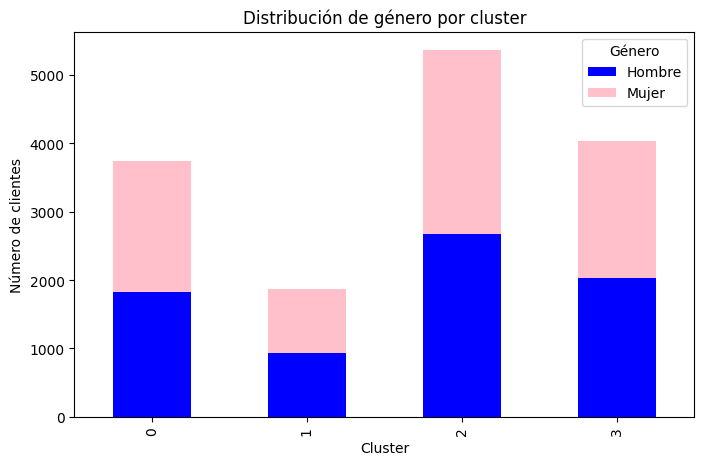

In [ ]:
import matplotlib.pyplot as plt


genero_por_cluster.plot(kind='bar', stacked=True, figsize=(8,5), color=['blue', 'pink'])
plt.xlabel('Cluster')
plt.ylabel('Número de clientes')
plt.title('Distribución de género por cluster')
plt.legend(title="Género", labels=['Hombre', 'Mujer'])
plt.show()


### P8. Plataforma por cluster


In [ ]:

plataforma_por_cluster = df.groupby(['cluster', 'plataforma']).size().unstack()

print("\nDistribución de plataformas por cluster:")
print(plataforma_por_cluster)



Distribución de plataformas por cluster:
plataforma  Facebook  Instagram  TikTok
cluster                                
0                522       1893    1320
1               1463        370      40
2                908       2501    1953
3               2316       1285     429


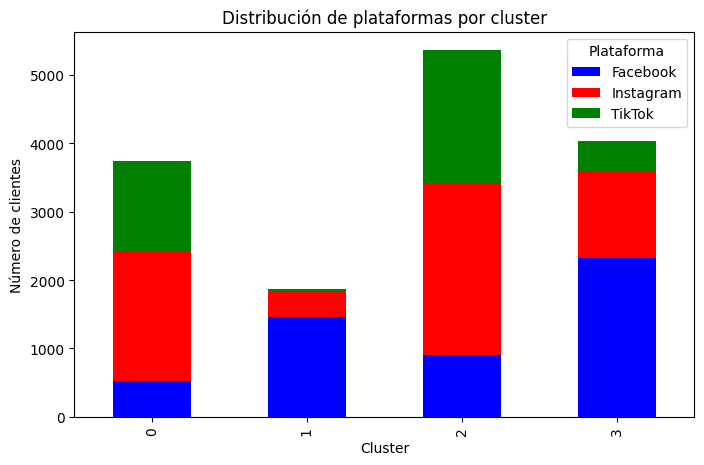

In [ ]:
import matplotlib.pyplot as plt

plataforma_por_cluster.plot(kind='bar', stacked=True, figsize=(8,5), color=['blue', 'red', 'green'])
plt.xlabel('Cluster')
plt.ylabel('Número de clientes')
plt.title('Distribución de plataformas por cluster')
plt.legend(title="Plataforma")
plt.show()


### 📝 FASE 5 – PROFILING & NAMING

#### P9. Asigna un nombre a cada cluster y describe en 2-3 líneas su perfil.

**1. Cluster 0: Jóvenes Digitales**
- Usuarios jóvenes (entre 18-30 años) con ingresos medios-bajos y alto consumo de contenido en Instagram y TikTok. Compran con frecuencia pero con ticket bajo.

**2. Cluster 1: Profesionales Saludables**
- Adultos con ingresos altos que buscan opciones saludables. Prefieren Facebook como plataforma y hacen compras más grandes pero menos frecuentes.

**3. Cluster 2: Consumidores Estratégicos**
-Clientes con ingresos medios, que compran en temporadas específicas y se informan antes de gastar. Usan Instagram y Facebook.

**4. Cluster 3: Big Spenders**
- Usuarios con alto LTV y hábitos de consumo intensivo. Compran grandes volúmenes y tienen ingresos altos. Se encuentran mayormente en Facebook.


### 💡 FASE 6 – DECISIÓN DE PRESUPUESTO

#### P10. Con 10 000 USD elige 2 clusters y asigna presupuesto.
#### P11. ¿Qué cluster fidelizarías con bajo costo?
#### P12. Enumera 2 riesgos o limitaciones del análisis.

**P10: Asignacion de presupuestos**
- Cluster 3: Alto LTV y rentabilidad. Inversión enfocada en programas VIP y exclusividades.  Cluster 1: Clientes con buen gasto promedio, pero baja frecuencia de compra. Inversión en fidelización.
- 60% para el cluster 3  y 40% ára el cluster 1

In [ ]:

presupuesto_total = 10000
presupuesto_clusters = {'Big Spenders': 6000, 'Profesionales Saludables': 4000}

print("Presupuesto asignado por cluster:")
print(presupuesto_clusters)



Presupuesto asignado por cluster:
{'Big Spenders': 6000, 'Profesionales Saludables': 4000}


**P11:Cluster a fidelizar con bajo costo**
- Cluster recomendado para fidelización:  Cluster 2 . Compran en temporadas específicas y buscan información antes de gastar.

**Estrategia de bajo costo:**
- Email marketing con recomendaciones personalizadas.
-Cupones de descuento en compras futuras.
- Contenido educativo sobre productos saludables.

In [ ]:

estrategia_fidelizacion = {
    'Email Marketing': 'Recomendaciones personalizadas',
    'Cupones': 'Descuento en compras futuras',
    'Contenido': 'Educación en hábitos saludables'
}

print("Estrategia de fidelización para consumidores estratégicos:")
print(estrategia_fidelizacion)


Estrategia de fidelización para consumidores estratégicos:
{'Email Marketing': 'Recomendaciones personalizadas', 'Cupones': 'Descuento en compras futuras', 'Contenido': 'Educación en hábitos saludables'}


**P12: Riesgos y limitaciones del análisis**
- Posibles riesgos en la segmentación y métricas: Limitación de datos históricos . Los clusters se basan en datos pasados y podrían no reflejar cambios futuros en el comportamiento de los clientes. Sesgo en la inversión publicitaria. Las plataformas con más clientes podrían recibir más inversión, dejando de lado oportunidades en canales menos explotados.

**Solución:**
- Actualizar el modelo de segmentación periódicamente.
- Test A/B para validar estrategias antes de inversiones grandes.
- Incluir más datos como hábitos de navegación y preferencias de productos.

### ENTREGA FINAL
#### Resumen ejecutivo (máx 1 página) con:
##### – Nombres y descripciones de los 4 clusters
##### – Tabla LTV, CAC, Ganancia, tamaño
##### – Plan de inversión y justificación
#### Comentarios sobre cómo mejorarías el dataset o la metodología